
## Analysis of Airbnb Amsterdam Data

Amsterdam is one of the most popular tourist destinations in Europe, attracting up to approximately 46 million tourists in the year 2019 alone. This has also led to significant popularity of Airbnb services within this beautiful city. The houses of the locals are culturally beatiful, and tourists often prefer staying at these localities, rather than going for hotels. These houses also offer cheaper prices which is another reason for Airbnb to have become popular.

For a person willing to rent a room or two from their house as a part of Airbnb services, it is important that the initial prices are chosen reasonably. A price quoted higher than what a room deserves to be quoted can lead to poor reviews, eventually reducing the revenue. Hence, it is important that the price of the room is properly assessed based on the locality, price in the region, as well as the services within.

Based on the problem outlined above, we address the following points this study. 
- Analyse the distribution of listings as well as the prices across neighborhoods
- Identify the regions where the prices are high, and relate them with possible touristic locations in Amsterdam. This information could help in selecting one among multiple properties to list on Airbnb while maximimizing the chances of profit.
- Forecast price for the listing (addressed in Modeling.ipynb)

In [1]:
import sys

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
########################################################################## 
#supress all warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#### Importing Data

In [6]:
# Read the data from csv file 
df_listing_details = pd.read_csv('../Data/amsterdam/listings_details.csv')
df_review_details = pd.read_csv('../Data/amsterdam/reviews_details.csv')
df_calender_details = pd.read_csv('../Data/amsterdam/calendar_details.csv')

In [7]:
df_listing_summary = pd.read_csv('../Data/amsterdam/listings_summary.csv')

In [8]:
df_listing_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2/14/2020,2.00,1,125
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,209,1,340,4/9/2020,2.67,3,3
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2/9/2020,0.16,1,188
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,219,7/25/2020,2.09,1,183
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,334,8/16/2020,2.74,2,348


### Missing Data Analysis

In [9]:
df_listing_summary.isna().mean()

id                                0.000000
name                              0.001742
host_id                           0.000000
host_name                         0.002903
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.122962
reviews_per_month                 0.122962
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

To analysie neighbourhood we will analyse "neighbourhood", "lat","long","price""host_id" cloumns , which has no missing values, so for this analysis not need for missing value interpolation. 

In [10]:
df_neighbour = df_listing_summary[["host_id", "neighbourhood", "latitude","longitude","price"]]

### Distribution of listings based on locality

In [11]:
list_neighbourhood = df_neighbour['neighbourhood'].unique()
print("Following are the neighbourhood of Amsterdam listed for listing: \n", list_neighbourhood)
df_neighbour_toplot = pd.DataFrame()
df_neighbour_toplot['total_listing'] = df_neighbour['neighbourhood'].value_counts()
df_neighbour_toplot["neighbourhood"] = df_neighbour_toplot.index

Following are the neighbourhood of Amsterdam listed for listing: 
 ['Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Centrum-West'
 'Zuid' 'De Pijp - Rivierenbuurt' 'De Baarsjes - Oud-West' 'Bos en Lommer'
 'Westerpark' 'Oud-Oost' 'Noord-West' 'Slotervaart' 'Oud-Noord'
 'Geuzenveld - Slotermeer' 'Watergraafsmeer' 'IJburg - Zeeburgereiland'
 'Noord-Oost' 'Gaasperdam - Driemond' 'Buitenveldert - Zuidas'
 'De Aker - Nieuw Sloten' 'Osdorp' 'Bijlmer-Centrum' 'Bijlmer-Oost']


In [12]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

[Text(0, 0, 'De Baarsjes - Oud-West'),
 Text(1, 0, 'De Pijp - Rivierenbuurt'),
 Text(2, 0, 'Centrum-West'),
 Text(3, 0, 'Centrum-Oost'),
 Text(4, 0, 'Westerpark'),
 Text(5, 0, 'Zuid'),
 Text(6, 0, 'Oud-Oost'),
 Text(7, 0, 'Bos en Lommer'),
 Text(8, 0, 'Oostelijk Havengebied - Indische Buurt'),
 Text(9, 0, 'Oud-Noord'),
 Text(10, 0, 'Watergraafsmeer'),
 Text(11, 0, 'IJburg - Zeeburgereiland'),
 Text(12, 0, 'Slotervaart'),
 Text(13, 0, 'Noord-West'),
 Text(14, 0, 'Noord-Oost'),
 Text(15, 0, 'Buitenveldert - Zuidas'),
 Text(16, 0, 'Geuzenveld - Slotermeer'),
 Text(17, 0, 'De Aker - Nieuw Sloten'),
 Text(18, 0, 'Osdorp'),
 Text(19, 0, 'Gaasperdam - Driemond'),
 Text(20, 0, 'Bijlmer-Centrum'),
 Text(21, 0, 'Bijlmer-Oost')]

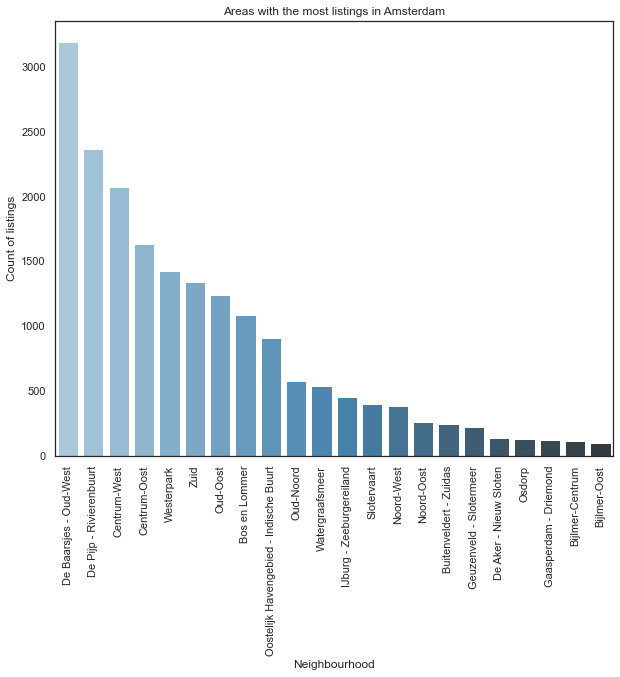

In [13]:
plot_1=sns.barplot(x="neighbourhood", y='total_listing', data=df_neighbour_toplot,
                 palette='Blues_d')
plot_1.set_title('Areas with the most listings in Amsterdam')
plot_1.set_ylabel('Count of listings')
plot_1.set_xlabel('Neighbourhood')
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Among the 22 neighborhoods listed on Airbnb, we see that most listings belong to De Baarsjes - Oud west neighborhood. Following it, there are large number of listings in De Pijp, Centrum region as well as those enclosing it (Westerpark and Zuid). Overall, most listings are clustered around the city center. This is expected since most tourists prefer to stay in the close vicinity of the famous places to be visited. 

Next, we study the statistical disitribution of the data for the top 10 neighborhoods from the listings.

In [14]:
top_10_neighbourhood = list(df_neighbour_toplot.index)[0:10]
top_10_df_neighbour = df_neighbour[df_neighbour["neighbourhood"].isin(top_10_neighbourhood)]
#print(top_10_df_neighbour["neighbourhood"].unique())

In [15]:
# Lets check the statistics
stat_df=top_10_df_neighbour[["price", "neighbourhood"]]
stat_df.groupby(["neighbourhood"]).describe(percentiles=[.25, .50, .75])

price                                \
                                         count        mean         std   min   
neighbourhood                                                                  
Bos en Lommer                           1087.0  125.063477   65.579992  16.0   
Centrum-Oost                            1632.0  189.099877  146.138740  20.0   
Centrum-West                            2071.0  192.147272  222.452075  23.0   
De Baarsjes - Oud-West                  3191.0  152.106236  103.214105  25.0   
De Pijp - Rivierenbuurt                 2367.0  165.185889  186.190815   5.0   
Oostelijk Havengebied - Indische Buurt   911.0  135.326015   89.198151  20.0   
Oud-Noord                                578.0  168.961938  222.748824  24.0   
Oud-Oost                                1240.0  146.238710   75.605905  22.0   
Westerpark                              1422.0  150.424754   87.133681  25.0   
Zuid                                    1341.0  177.888143  132.072688  19.0   

                                                                      
                                          25%    50%     75%     max  
neighbourhood                                                         
Bos en Lommer                            89.0  110.0  150.00   799.0  
Centrum-Oost                            111.0  150.0  222.50  2500.0  
Centrum-West                            105.0  150.0  223.50  8000.0  
De Baarsjes - Oud-West                  100.0  130.0  180.00  3000.0  
De Pijp - Rivierenbuurt                 100.0  140.0  198.00  8000.0  
Oostelijk Havengebied - Indische Buurt   88.0  114.0  150.00   999.0  
Oud-Noord                                90.0  125.0  179.75  4461.0  
Oud-Oost                                100.0  129.0  175.00   890.0  
Westerpark                              100.0  129.5  178.00  1150.0  
Zuid                                    100.0  141.0  205.00  2000.0

From the analysis presented above, we see that the mean prices as well as the variance are significantly higher in the regions closer to the city center when compared to the places away from it. For example, the mean price in centrum west is 192 with a variance of 222. However, we also see outliers in several of this samples with prices reported as high as 8000, which seems unrealistic. For a more reliable understanding, we look at the 3rd quartile scores, and these as well as the median scores are the highest in centrum east and west, De Pijp region and Amsterdam Zuid. These align with the fact that the first three have several popular tourist destinations, and the last one has several corporate offices which could possibly attract Airbnb listings. Overall, choosing one of these 4 listings could possibly be a nice deal in terms of maximizing the return from the listing. For more concrete analysis, data on daily reservations should also be studied, however, we keep it beyond the scope of this study.

In [16]:
top_10_df_neighbour_cleaned = top_10_df_neighbour[top_10_df_neighbour.price < 400]

Below, we also provide a visualization for better understanding of the distribution of prices.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(1, 0, 'Centrum-Oost'),
  Text(2, 0, 'Centrum-West'),
  Text(3, 0, 'Zuid'),
  Text(4, 0, 'De Pijp - Rivierenbuurt'),
  Text(5, 0, 'De Baarsjes - Oud-West'),
  Text(6, 0, 'Bos en Lommer'),
  Text(7, 0, 'Westerpark'),
  Text(8, 0, 'Oud-Oost'),
  Text(9, 0, 'Oud-Noord')])

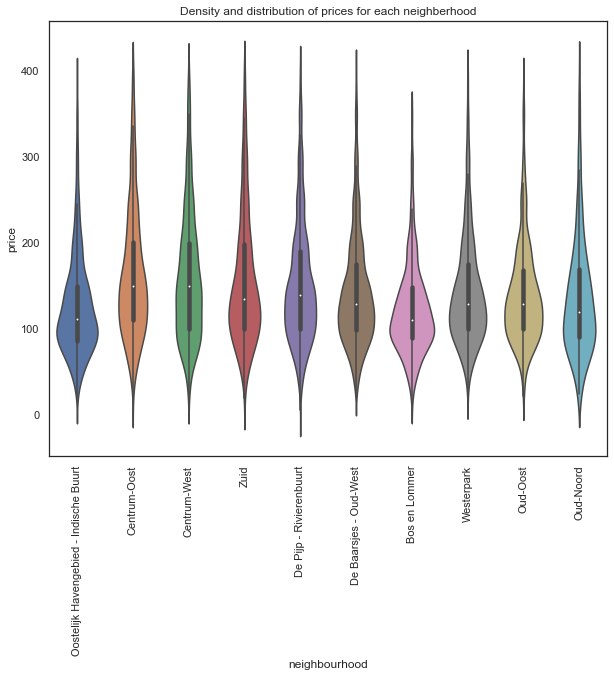

In [17]:
viz_2 = sns.violinplot(data=top_10_df_neighbour_cleaned, x = "neighbourhood", y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood')
plt.xticks(rotation=90)

No handles with labels found to put in legend.


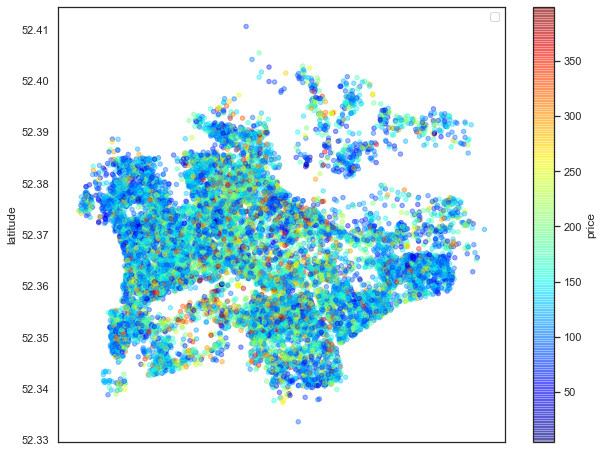

In [18]:
#let's what we can do with our given longtitude and latitude columns
viz_4=top_10_df_neighbour_cleaned.plot(kind='scatter', x='longitude', y='latitude', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [19]:
lats2018 = top_10_df_neighbour_cleaned['latitude'].tolist()
lons2018 = top_10_df_neighbour_cleaned['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map)
#display(map)
map

### Lets check which neighbour hood is expensive

Since 2-person accommodations are the most common, we also study the distribution of prices for 2-person accommodation.

In [20]:
from utils.price_mapper import price_mapper
df_listing_details['price'] = df_listing_details['price'].map(price_mapper)

<function matplotlib.pyplot.show(close=None, block=None)>

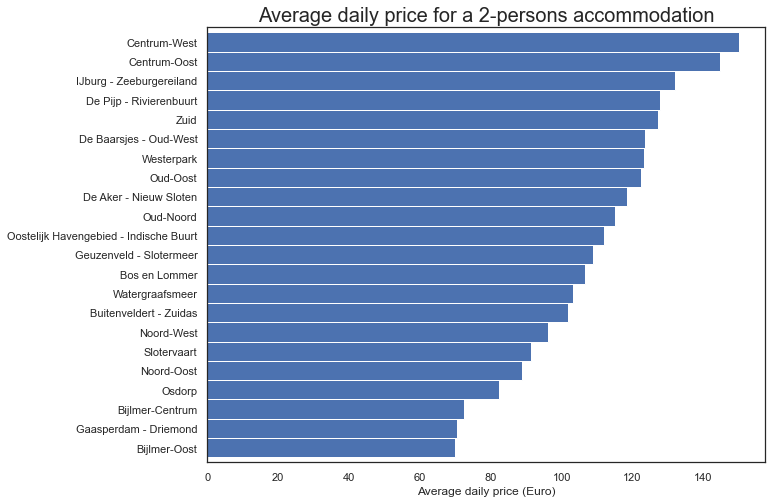

In [21]:
subset_df_listing_details = df_listing_details[df_listing_details['accommodates']==2]
grouped_df_by_nei=subset_df_listing_details [["price", "neighbourhood_cleansed"]]
grouped_df_by_nei = grouped_df_by_nei.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
grouped_df_by_nei.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show

We see that the observations for 2-person accommodation are similar, with the highest prices being mostly around the city center and adjoining areas. 

In [34]:
from branca.colormap import LinearColormap
geojson_map = gpd.read_file("../Data/Amsterdam/neighbourhoods.geojson")
#print(geojson_map)
grouped_df_by_nei = pd.DataFrame([grouped_df_by_nei])
grouped_df_by_nei = grouped_df_by_nei.transpose()
grouped_df_by_nei['neighbourhood'] = grouped_df_by_nei.index
grouped_df_by_nei.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True) 
geojson_map = pd.merge(geojson_map, grouped_df_by_nei, on='neighbourhood', how='left')
#print(geojson_map)
geojson_map.rename(columns={'price': 'average_price'}, inplace=True)
geojson_map.average_price = geojson_map.average_price.round(decimals=0)

map_dict = geojson_map.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)
map2 = folium.Map(location=[52.3680, 4.9036], zoom_start=11)
folium.GeoJson(data=geojson_map,
               name='Amsterdam',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map2)
display(map2)

#### Conclusions

In this work, we analyzed the Airbnb data of the city of Amsterdam and studied the distributions of listings and pricings. A general observation is that the prices are higher around the city center. We also show this on the map above. In general, most tourist destinations are closer to this region due to which the prices are higher in this areas. Clearly, if we intend to put a new listing this region, we would prefer to quote a higher price.

We observed that the prices are also higher in the southern region as well as De Pijp areas of Amsterdam. These regions are primarly crowded with corporate offices, which is probably the reason that the prices are higher in these areas as well.